# 1.1 

In [ ]:
def g(f,m,n): 
    for i in range(0,n):
        print(f(m*(2**i)))
        
def f(m):
    l=[0 for _ in range(m)]
    return l 

from random import randint
def rand_list(m):
    lis=[ randint(-1000,1000) for _ in range(m)]
    return lis

g(rand_list,2,3)

# 1.2 

In [1]:
#insertion sort + selection sort + bubble sort + runtime w/ timeit
import timeit
import random

def insertion(l): 
    step=0 
    for i in range(1,len(l)): 
        x=l[i]
        step+=1 
        j=i-1
        step+=1
        while j>=0 and l[j]>x: 
            step+=2
            l[j+1]=l[j]
            step+=1
            j=j-1
            step+=1
        l[j+1]=x
        step+=1
    return(step+2)
    
def selection(l): 
    step=0
    for i in range(len(l)): 
        index=i
        step+=1
        for j in range(i+1,len(l)):
            if l[j]<l[index]: 
                step+=1 
                index=j
                step+=1
        l[index],l[i]=l[i],l[index]
        step+=2 
    return(step)
    
def bubble(l): 
    step=0 
    for i in range(len(l)):
        step+=1
        for j in range(len(l)-i-1):
            step+=1 
            if l[j]>l[j+1]: 
                l[j],l[j+1]=l[j+1],l[j]
                step+=2 
    return(step)
    
def wrap(func, args):
    def wrapped():
        return func(args)
    return wrapped

l=random.sample(range(1,100),10)
t=timeit.timeit(wrap(insertion,l),number=100000)
print("Average Execution Time of Insertion Sort:", t/100000)

Average Execution Time of Insertion Sort: 3.5254482200252824e-06


In [ ]:
#shell sort 
def shellSort(m):
    interval = 50
    while interval > 0:
        for index in range(interval):
            m[index::interval] = insertion(m[index::interval])
        interval = int(interval/2)
    return m

# 2.1

In [ ]:
#merge sort w/ step counter and timing w/ cProfile
import math 
import random
import cProfile

def merge(l,x,y,z): 
    n1=y-x+1
    n2=z-y
    L=[]
    R=[]
    for _ in range(0,n1):
        L.append(l[x+_])
    for _ in range(0,n2): 
        R.append(l[y+_+1])
    L.append(math.inf)
    R.append(math.inf)
    i=0
    j=0
    for k in range(x,z+1): 
        if L[i]<=R[j]:
            l[k]=L[i]
            i=i+1
        else: 
            l[k]=R[j]
            j=j+1
            
def mergesort(l,x,z):
    if x<z: 
        y=math.floor((x+z)/2)
        mergesort(l,x,y)
        mergesort(l,y+1,z)
        merge(l,x,y,z)
            
l=[random.randint(-1998,1998) for _ in range(251)]
mergesort(l,0,len(l)-1)
print(l)
cProfile.run('mergesort(l,0,len(l)-1)')

# 2.2

In [ ]:
#brute-force maximum subarray 
import random 
import math

l=[random.randint(-100,100) for i in range(30)]
ltest=[13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
maxsum=-math.inf

i=0
findex="base"
lindex="base"
while i<len(l):
    j=1
    while (i+j)<len(l):
        if sum(l[i:i+j])>maxsum:
            maxsum=sum(l[i:i+j])
            findex=i
            lindex=i+j-1
        j+=1 
    i+=1 
    
print(findex,lindex,maxsum)

In [ ]:
#function plotter
import numpy as np
import math
import matplotlib.pyplot as plt

x=np.linspace(-15,15,1000)

plt.plot(x, 2*x+1,"red")
plt.plot(x,np.cos(x),"green")
plt.show()

In [ ]:
#maximum subarry divide conquer 
import random 
import math 

def findmaxcross(l,low,mid,high): 
    leftsum=-math.inf
    ssum=0
    i=mid 
    while i>=low: 
        ssum=ssum+l[i]
        if ssum>leftsum: 
            leftsum=ssum
            leftindex=i 
        i=i-1 
    rightsum=-math.inf
    ssum=0
    i=mid+1  
    while i<=high: 
        ssum=ssum+l[i]
        if ssum>rightsum: 
            rightsum=ssum
            rightindex=i 
        i=i+1
    return(leftindex,rightindex,leftsum+rightsum)

    
def subdivideconquer(l,low,high): 
    if high==low: 
        return(low,high,l[high])
    else: 
        mid=math.floor((low+high)/2)
        leftlow,lefthigh,leftsum=subdivideconquer(l,low,mid)
        rightlow,righthigh,rightsum=subdivideconquer(l,mid+1,high)
        crosslow,crosshigh,crosssum=findmaxcross(l,low,mid,high)
        if leftsum>=rightsum and leftsum>=crosssum:
            return(leftlow,lefthigh,leftsum)
        elif rightsum>=leftsum and rightsum>= crosssum: 
            return(rightlow,righthigh,rightsum)
        else: 
            return(crosslow, crosshigh,crosssum)
l=[random.randint(-100,100) for i in range(30)]
print(subdivideconquer(l,0,len(l)-1))

# 3.1 

In [ ]:
#maximum subarray if knew subarray of a given subset of the array 
import cProfile
import random 
import math 


def findmaxcross(l,low,mid,high): 
    leftsum=-math.inf
    ssum=0
    i=mid 
    while i>=low: 
        ssum=ssum+l[i]
        if ssum>leftsum: 
            leftsum=ssum
            leftindex=i 
        i=i-1 
    rightsum=-math.inf
    ssum=0
    i=mid+1  
    while i<=high: 
        ssum=ssum+l[i]
        if ssum>rightsum: 
            rightsum=ssum
            rightindex=i 
        i=i+1
    return(leftindex,rightindex,leftsum+rightsum)

    
def subdivideconquer(l,low,high): 
    if high==low: 
        return(low,high,l[high])
    else: 
        mid=math.floor((low+high)/2)
        leftlow,lefthigh,leftsum=subdivideconquer(l,low,mid)
        rightlow,righthigh,rightsum=subdivideconquer(l,mid+1,high)
        crosslow,crosshigh,crosssum=findmaxcross(l,low,mid,high)
        if leftsum>=rightsum and leftsum>=crosssum:
            return(leftlow,lefthigh,leftsum)
        elif rightsum>=leftsum and rightsum>= crosssum: 
            return(rightlow,righthigh,rightsum)
        else: 
            return(crosslow, crosshigh,crosssum)

def subsubarray(l,subl):
    if l[len(l)-1]<0: 
        return(subl)
    else: 
        mid=math.floor((len(l)-1)/2)
        rightlow,righthigh,rightsum=subdivideconquer(l,mid+1,len(l)-1)
        crosslow,crosshigh,crosssum=findmaxcross(l,0,mid,len(l)-1)
    if subl[2]>=rightsum and subl[2]>=crosssum:
        return(subl)
    elif rightsum>=subl[2] and rightsum>= crosssum: 
            return(rightlow,righthigh,rightsum)
    else: 
        return(crosslow, crosshigh,crosssum)
    
l=[random.randint(-100,100) for i in range(10000)]
subl=subdivideconquer(l,0,len(l)-2)
cProfile.run("subsubarray(l,subl)")
cProfile.run("subdivideconquer(l,0,len(l)-1)")

    

In [ ]:
#plot function by input size
import math 
import timeit 
import random 
import matplotlib.pyplot as plt

def findmaxcross(l,low,mid,high): 
    leftsum=-math.inf
    ssum=0
    i=mid 
    while i>=low: 
        ssum=ssum+l[i]
        if ssum>leftsum: 
            leftsum=ssum
            leftindex=i 
        i=i-1 
    rightsum=-math.inf
    ssum=0
    i=mid+1  
    while i<=high: 
        ssum=ssum+l[i]
        if ssum>rightsum: 
            rightsum=ssum
            rightindex=i 
        i=i+1
    return(leftindex,rightindex,leftsum+rightsum)

    
def subdivideconquer(l,low,high): 
    if high==low: 
        return(low,high,l[high])
    else: 
        mid=math.floor((low+high)/2)
        leftlow,lefthigh,leftsum=subdivideconquer(l,low,mid)
        rightlow,righthigh,rightsum=subdivideconquer(l,mid+1,high)
        crosslow,crosshigh,crosssum=findmaxcross(l,low,mid,high)
        if leftsum>=rightsum and leftsum>=crosssum:
            return(leftlow,lefthigh,leftsum)
        elif rightsum>=leftsum and rightsum>= crosssum: 
            return(rightlow,righthigh,rightsum)
        else: 
            return(crosslow, crosshigh,crosssum)

def subsubarray(l,subl):
    if l[len(l)-1]<0: 
        return(subl)
    else: 
        mid=math.floor((len(l)-1)/2)
        rightlow,righthigh,rightsum=subdivideconquer(l,mid+1,len(l)-1). #Calling the recursion 
        crosslow,crosshigh,crosssum=findmaxcross(l,0,mid,len(l)-1)      #Theta(n) 
    if subl[2]>=rightsum and subl[2]>=crosssum:
        return(subl)
    elif rightsum>=subl[2] and rightsum>= crosssum: 
            return(rightlow,righthigh,rightsum)
    else: 
        return(crosslow, crosshigh,crosssum)

def wrap1(func, args1,args2,args3):
    def wrapped():
        return func(args1,args2,args3)
    return wrapped

def wrap2(func, args1,args2):
    def wrapped():
        return func(args1,args2)
    return wrapped
t1=[]
t2=[]
x=[_ for _ in range(10,1000)]
for i in range(10,1000):
    l=[random.randint(-100,100) for _ in range(i)]
    l1=subdivideconquer(l,0,len(l)-2)
    t1.append(timeit.timeit(wrap1(subdivideconquer,l,0,len(l)-1),number=100))
    t2.append(timeit.timeit(wrap2(subsubarray,l,l1),number=100))
    

plt.plot(x,t1,'red')
plt.plot(x,t2,'blue')
plt.show()


In [ ]:
# Philip
def recursive_mx_subarray(A):
    if len(A) == 0: #base case
        return (0, 0)
    (mx_subarray, mx_endarray) = recursive_mx_subarray(A[:-1])
    mx_endarray = max(mx_endarray + A[-1], 0)
    mx_subarray = max(mx_subarray, mx_endarray)
    return mx_subarray, mx_endarray


def mx_subarray(A):
    (x,_) = recursive_mx_subarray(A)
    return x
    
A = [7,1,-2,2,1,-3,-3,4]
mx_subarray(A)

# 3.2

In [ ]:
#maxheapify & buildmaxheap
import math 
import random 

def parent(i): 
    return(math.floor((i-1)/2)) 
def left(i): 
    return(2*i+1)
def right(i): 
    return(2*i+2)

def maxheapify(L,i,size): 
    l=left(i)
    r=right(i)
    if l<=(size-1) and L[l]>=L[i]: 
        largest=l
    else: 
        largest=i 
    if r<=(size-1) and L[r]>=L[largest]: 
        largest=r
    if largest != i: 
        L[i],L[largest]=L[largest],L[i]
        maxheapify(L,largest,size)
        
def buildmaxheap(L): 
    size=len(L)
    for i in range(parent(len(L)-1),-1,-1): 
        maxheapify(L,i,size)

def heapsort(L):
    buildmaxheap(L)
    size=len(L)
    for i in range(len(L)-1,0,-1): 
        L[i],L[0]=L[0],L[i]
        size=size-1
        maxheapify(L,0,size)
        
L=[random.randint(-100,100) for _ in range(10)]
heapsort(L)
L

# 4.1

In [ ]:
#heappush, heappop, heapify 

import math 
import random 

def parent(i): 
    return(math.floor((i-1)/2)) 
def left(i): 
    return(2*i+1)
def right(i): 
    return(2*i+2)

def minheapify(L,i,size): 
    l=left(i)
    r=right(i)
    if l<=(size-1) and L[l]<=L[i]: 
        smallest=l
    else: 
        smallest=i 
    if r<=(size-1) and L[r]<=L[smallest]: 
        smallest=r
    if smallest != i: 
        L[i],L[smallest]=L[smallest],L[i]
        minheapify(L,smallest,size)
        
def buildminheap(L): 
    size=len(L)
    for i in range(parent(len(L)-1),-1,-1): 
        minheapify(L,i,size)

def minheappush(L,item):
    size=len(L)+1
    L.append(item)
    minheapify(L,0,size) ##wrong## 
    
def minheappop(L): 
    if len(L)==0: 
        print("IndexError")
    else: 
        popitem=L[0]
        L[0]=L[len(L)-1]
        size=len(L)-2
        minheapify(L,0,size)
    return(popitem)
        
L=[random.randint(-100,100) for _ in range(5)]
buildminheap(L)
print(L)
minheappush(L,-1000)
print(L)



In [ ]:
"A simple simulation of radioactivity."
import heapq
import random

N = 1000  # Number of atoms
p_hit = 0.9  # Probability that a particle will hit another atom
n_particles = 2  # Number of particles released
halflife = 1e6  # halflife of the atoms:
collision_time = 1e-6  # Time for collision:



def decay(has_decayed, current_time, index, heap):
    if has_decayed[index]:
        return  # Already decayed, return early
    # now the atom has decayed
    print("Atom %d decayed at time: %3.6f" % (index, current_time))
    has_decayed[index] = True
    for n in range(n_particles):
        if random.random() < p_hit:
            # The particle hit another atom
            next_time = current_time + collision_time
            next_index = random.randint(0, N - 1)
            # Schedule the decay of atom next_index at time next_time
            next_event = (next_time, next_index)
            heapq.heappush(heap, next_event)

print("Starting")
has_decayed = [False for a in range(N)]
times = [random.expovariate(1.0 / halflife) for a in range(N)]
# Create a heap containing the# times of all the atoms decays:
heap = []
for x in range(N):
    heapq.heappush(heap, (times[x], x))


print("Running")
# Now implement a continuous time simulation using a heap:
while heap:   #does this mean while len(heap) 0? Yes! :-)
    ###
    (time, index) = heapq.heappop(heap)
    decay(has_decayed, time, index, heap)

print("Finished")

# 4.2

In [ ]:
#hiring assistant simulation
import random
import matplotlib.pyplot as plt

n=1000 #number of employees
best=0 
hired=0
record=[]
x=[_ for _ in range(n)]
quality=[random.uniform(0,1) for i in range(n)]



for i in range(n): 
    if quality[i]>best+0.1:
        best=quality[i]
        hired+=1 
    record.append(hired)

plt.plot(x,record)
plt.show()


#possibility of hiring 1 assistant or 2 assistants: 1/n because you will have to hire the best or the second-best
# in the beginning, respectively

#optimal stopping rule: assuming that the M amount of work worths M*w. We stop the algorithm when either the pool is
#exhausted or M*w*quality[i]-X-Y-Z>=0 



In [ ]:
#hat check 

import random 

n=1000 #number of people at the parties
countright=[]

for i in range(1000):
    
    dummy=[_ for _ in range(n)]
    returnhat=[]

    while dummy: 
        r=random.randint(0,len(dummy)-1)
        returnhat.append(dummy[r])
        dummy.remove(dummy[r])

    correcthat=[_ for _ in range(n)]
    right=0
    for i in range(len(correcthat)):
        if correcthat[i]==returnhat[i]:
            right+=1
    countright.append(right)
    
    
sum(countright)/float(len(countright))

#the average correct return is 1 
#the distribution is binomial distribution 


# 5.1

In [ ]:
#worst sorting algorithm 
import random 

def shuffleit(l):
    for _ in range(len(l)):
        rand=random.randrange(_,len(l))
        l[_],l[rand]=l[rand],l[_]
    return(l)


def worstsort(l): 
    isitsorted=False
    while isitsorted==False: 
        shuffleit(l)
        for i in range(len(l)-1): 
            count=0
            if l[i]<=l[i+1]: 
                count+=1
        if count==len(l)-1:
            isitsorted=True
    return(l)

l=[7,11,1]
worstsort(l)

#best case complexity: when the first permutation is in correct order - O(n)
#average case complexity: O(n!n)
# Around 4 items 

In [ ]:
#median guesser 
import random 
import math

def medguesser(l,sigma): 
    leftindex=math.floor((0.5-sigma)*len(l))
    rightindex=math.floor((0.5+sigma)*len(l))
    rand=0
    count=0
    while rand>rightindex or rand<leftindex: 
        rand=random.randrange(len(l))
        count=count+1
        if count>=10: 
            print("Procedure Failed, tried %d times" %count)
            break
    else: 
        print('Best guess for a number between the %1.2f and %1.2f quantile is %d' % (0.5-sigma, 0.5+sigma, l[rand]))

l=[random.randint(-1000,1000) for _ in range(1000)]

medguesser(l,0.05)

#Chance of failure for 10 trials: (1-2*sigma)^10
#Time complexity for average case: constant time 
#Space complexity: stored 4 variables 
#Optimization: 

# 6.1

In [ ]:
#deterministic quicksort 
import random

def partition(L,start,end): 
    anchor=L[end]
    i=start-1
    for j in range(start,end): 
        if L[j]<=anchor:
            i+=1
            L[i],L[j]=L[j],L[i]
    L[i+1],L[end]=L[end],L[i+1]
    return(i+1)

def quicksort(L,start,end):
    if start<end:
        mid=partition(L,start,end)
        quicksort(L,start,mid-1)
        quicksort(L,mid+1,end)

#time

import timeit 

test1=[random.random() for _ in range(10000)]
test2=[_ for _ in range(400)]


def wrap(func, args1,args2,args3):
    def wrapped():
        return func(args1,args2,args3)
    return wrapped

print(timeit.timeit(wrap(quicksort,test1,0,len(test1)-1),number=1))
print(timeit.timeit(wrap(quicksort,test2,0,len(test2)-1),number=1))

In [ ]:
#Fibonnanci

def fib(n): 
    if n <= 0: 
        return 0 
    if n == 1: 
        return 1 
    return fib(n-1) + fib(n-2)

import timeit
def wrapfib(func, args1):
    def wrapped():
        return func(args1)
    return wrapped
fib(50)

# 6.2

In [ ]:
import timeit
import random

eps = 1e-16
N = 1000000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    for a in range(7):
        if x1 <= x2 <= x3:
            return x2
        # Every loop I'm shufflin
        (x1, x2, x3) = (x2, x1, x3)
        if a % 2:
            (x1, x2, x3) = (x3, x1, x2)


def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [_ for _ in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    lst = randomized_quicksort()
    assert(lst == [_ for _ in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

In [ ]:
def qsort_recursive(lst,frm,to):
    if frm<to:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)
        
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        lst[frm:ind1]=qsort_recursive(lst[frm:ind1],0,len(lst[frm:ind1]))
        lst[ind2:to]=qsort_recursive(lst[ind2:to],0,len(lst[ind2:to]))
    return lst



1. Remove separate handling of items equal to the partition value. (What is the time complexity of the new quicksort when dealing with a list of duplicate? What was it before?) 

O(n^2) if not enable duplicate. O(n) if enable duplicate 

2. Remove the median-of-3 partitioning, and just use the first element in the array. Does change the time complexity? Do you have any intuition if it will change the practical performance? 

It probably won't change time complexity. We should expect, on average, the time complexity is still O(nlogn)

3. Implement a recursive version of qsort. Given the limitation of python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by python. Explicitly state all assumptions you make in getting to an answer. Make sure that your sorting modifications are still valid sorting methods (i.e. they always return sorted lists) and bring your code to class, ready to run in a Jupyter notebook. 

# 7.1 


In [ ]:
#median heap
from heapq import *
import random 
import math


def parent(i): 
    return(math.floor((i-1)/2)) 
def left(i): 
    return(2*i+1)
def right(i): 
    return(2*i+2)

def maxheapify(L,i,size): 
    l=left(i)
    r=right(i)
    if l<=(size-1) and L[l]>=L[i]: 
        largest=l
    else: 
        largest=i 
    if r<=(size-1) and L[r]>=L[largest]: 
        largest=r
    if largest != i: 
        L[i],L[largest]=L[largest],L[i]
        maxheapify(L,largest,size)
        
def buildmaxheap(L): 
    size=len(L)
    for i in range(parent(len(L)-1),-1,-1): 
        maxheapify(L,i,size)

def median(minheap,maxheap): 
    if len(minheap)>len(maxheap): 
        med=minheap[0]
    elif len(minheap)<len(maxheap):
        med=maxheap[0]
    elif len(minheap)==len(maxheap): 
        rando=random.randint(0,1)
        if rando==0: 
            med=maxheap[0]
        else:
            med=minheap[0]
    return(med)
            
        
def add_median(minheap,maxheap,a):
    if len(minheap)==0:
        minheap.insert(0,a)
    else:        
        if len(maxheap)==0:
            maxheap.insert(0,a)
        else: 
            if a>=minheap[0] and len(maxheap)>0: 
                minheap.insert(0,a)
                heapify(minheap)
            elif a<minheap[0] and len(minheap)>0: 
                maxheap.insert(0,a)
                buildmaxheap(maxheap)
    if len(maxheap)>len(minheap)+1:
        x=maxheap.pop(0)
        minheap.insert(0,x)
        buildmaxheap(maxheap)
        heapify(minheap)
    if len(minheap)>len(maxheap)+1:
        x=minheap.pop(0)
        maxheap.insert(0,x)
        buildmaxheap(maxheap)
        heapify(minheap)
    
        
minh = [101]
maxh = []
for a in range(1,100,2):
    add_median(minh, maxh, a)

median(minh,maxh)

In [ ]:
#quickselect
import random 

def partition_r(L,start,end): 
    r=random.randint(0,len(L)-1)
    anchor=L[r]
    i=start-1
    for j in range(start,end): 
        if L[j]<=anchor:
            i+=1
            L[i],L[j]=L[j],L[i]
    L[i+1],L[r]=L[r],L[i+1]
    return(i+1)

def quickselect(L,k):
    q=partition_r(L,0,len(L)-1)
    if q==k: 
        return(L[q])
    elif q>k: 
        return(quickselect(L[:q],k))
    else: 
        return(quickselect(L[q+1:],k-q-1))
    
    
    
lst = [_ for _ in range(1000)] 
random.shuffle(lst)
for a in range(1000):
        print(quickselect(lst,a))


# 7.2 

In [ ]:
# direct-address table
N=10

def initiate(): 
    tab=[]
    for i in range(N): 
        tab.append("")
    return(tab)

def insert(tab, guess, i):
    tab[i]=guess 
    
def delete(tab, i): 
    tab[i]=""
    
T=initiate()
insert(T,"Ash",5)
insert(T,"Prof.Stern",2)
delete(T,5)
print(T)

In [ ]:
# hash table

import random
import string


def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))


def empty_hash_table(N):
    return [[] for n in range(N)]


def add_to_hash_table(hash_table, item, hash_function):
    N = len(hash_table)
    x=hash_function(item)
    hash_table[x].append(item)
    return hash_table


def contains(hash_table, item, hash_function):
    N = len(hash_table)
    List=hash_table[hash_function(item)]
    r=False
    for _ in range(len(List)): 
        if List[_]==item: 
            r=True 
    return(r)


def remove(hash_table, item, hash_function):
    if not contains(hash_table, item, hash_function):
        raise ValueError()
    List=hash_table[hash_function(item)]
    for _ in range(len(List)): 
        if List[_]==item: 
            ind=_ 
    del(List[ind])


def hash_str1(string):
    ans = 0
    for chr in string:
        ans += ord(chr)
    return ans


def hash_str2(string):
    ans = 0
    for chr in string:
        ans = ans ^ ord(chr)
    return ans


def hash_str3(string):
    ans = 0
    for chr in string:
        ans = ans * 128 + ord(chr)
    return ans


def hash_str4(string):
    random.seed(ord(string[0]))
    return random.getrandbits(32)

In [ ]:
import numpy as np
import timeit 

def RANDOMWORD(length):
    return ''.join(random.choice(string.ascii_uppercase) for i in range(length))

RANDOMWORDS=[]
for i in range(10000): 
    RANDOMWORDS.append(RANDOMWORD(5))

randomwords=[]
for i in range(100000): 
    randomwords.append(randomword(10))


hash1=empty_hash_table(5000) 
hash2=empty_hash_table(5000)
for i in range(100000): 
    add_to_hash_table(hash1,randomwords[i],hash_str1)
    add_to_hash_table(hash2,randomwords[i],hash_str2)

col1=0
col2=0
ele1=[]
ele2=[]
for i in range(len(hash1)):
    if len(hash1[i])>0:
        ele1.append(len(hash1[i]))
    if len(hash2[i])>0:
        ele2.append(len(hash2[i]))
    if len(hash1[i])>1: 
        col1+=1
    if len(hash2[i])>1: 
        col2+=1
print("Number of bucket with collision:")
print(col1)
print(col2)
print("Average Number of Items in Each Bucket:")
print(np.mean(ele1))
print(np.mean(ele2))


def findTrueItem1():
    return(contains(hash1,randomwords[0],hash_str1))
def findTrueItem2():
    return(contains(hash2,randomwords[0],hash_str2))

def find10000FalseItem1(): 
    for _ in range(len(RANDOMWORDS)):
        return(contains(hash1,RANDOMWORDS[i],hash_str1))
def find10000FalseItem2(): 
    for _ in range(len(RANDOMWORDS)):
        return(contains(hash2,RANDOMWORDS[i],hash_str2))
    

print("Time:")
print(timeit.timeit(findTrueItem1,number=1))
print(timeit.timeit(findTrueItem2,number=1))
print(timeit.timeit(find10000FalseItem1,number=1))
print(timeit.timeit(find10000FalseItem2,number=1))
      

# 8.2 

In [ ]:
#list insert, delete, search

def sorted_insert(l,val): 
    l.append(val)
    insertion_sort(l)
    return(l)

def sorted_search(l,val): 
    i=0
    while val<l[i]:
        i+=1
    if val=l[i]:
        return(i)
    elif val=l[i-1]: 
        return(i-1)
    else: 
        return(None)

def sorted_delete(l,val): 
    i=0
    while val!=l[i] and i<len(l):
        i+=1
    l.pop(i)
    return(l)

#sequeces

import random 

insert=[random.randint(0,1000) for _ in range(1000)]
search=[random.randint(0,1000) for _ in range(100)]
delete=[insert[_] for _ in range(100,200)]

#test 
l=[]
T=Node(None)

for i in len(insert): 
    insert(T, insert[i])
    sorted_insert(l,insert[i])

for i in len(search):
    search(T,search[i])
    sorted_search(l,search[i])

for i in len(delete): 
    delete(T, delete[i])
    sorted_delete(l,delete[i])

# inorder tranversal 

def in_order(root):
    if root==None:
        return(root)
    in_order(root.l_child)
    print(root.data)
    in_order(root.r_child)

In [ ]:
#Konstantine: https://gist.github.com/kgerov/825fd2117dc383d1ba461fbb0770f9d3 
import random

class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

def insert(root, node):
    if root is None:
        root = node
    else:
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                insert(root.l_child, node)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                insert(root.r_child, node)
def search(root, value):
    while root is not None and value != root.data:
        if value < root.data:
            root = root.l_child
        else:
            root = root.r_child

    return root

def get_minimum(node):
    while node.l_child is not None:
        node = node.l_child

    return node

def delete(root, node):
    if node.l_child is None:
        transplant(root, node, node.r_child)
    elif node.r_child is None:
        transplant(root, node, node.l_child)
    else:
        y = get_minimum(node.r_child)

        if y.parent.data != node.data:
            transplant(root, y, y.r_child)
            y.r_child = node.r_child
            y.r_child.parent = y

        transplant(root, node, y)
        y.l_child = node.l_child
        y.l_child.parent = y

def transplant(root, replace, replacement):
    if replace.parent is None:
        root = replacement
    elif replace.data == replace.parent.l_child.data:
        replace.parent.l_child = replacement
    else:
        replace.parent.r_child = replacement

    if replacement != None:
        replacement.parent = replace.parent

def inorder_traversal(root):
    if root is not None:
        inorder_traversal(root.l_child)
        print(root.data)
        inorder_traversal(root.r_child)


In [ ]:
#model implementation 

class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val


class Tree:
    def __init__(self):
        self.root = None


def make_list(node, lst):
    if node is None:
        return
    make_list(node.l_child, lst)
    lst.append(node.data)
    make_list(node.r_child, lst)


def minimum(node):
    while node.l_child is not None:
        node = node.l_child
    return node


def insert(tree, z):
    y = None
    x = tree.root
    while x is not None:
        y = x
        if z.data < x.data:
            x = x.l_child
        else:
            x = x.r_child
    z.parent = y
    if y is None:
        tree.root = z
    elif z.data < y.data:
        y.l_child = z
    else:
        y.r_child = z


def search(node, data):
    while (node is not None) and (node.data != data):
        if data < node.data:
            node = node.l_child
        else:
            node = node.r_child
    return node


def transplant(tree, u, v):
    if u.parent is None:
        tree.root = v
    elif u == u.parent.l_child:
        u.parent.l_child = v
    else:
        u.parent.r_child = v
    if v is not None:
        v.parent = u.parent


def delete(tree, node):
    if node.l_child is None:
        transplant(tree, node, node.r_child)

    # node has one child, move that child up
    elif node.r_child is None:
        transplant(tree, node, node.l_child)

    # node has two children, replace node by successor than remove successor
    else:
        successor = minimum(node.r_child)
        if successor.parent != node:
            transplant(tree, successor, successor.r_child)
            successor.r_child = node.r_child
            successor.r_child.parent = successor
        transplant(tree, node, successor)
        successor.l_child = node.l_child
        successor.l_child.parent = successor

# time comparisons
n_insert = 100000
n_search = 1000
n_delete = 1000


def random_list(n):
    lst = []
    for i in range(n):
        lst.append(int(1000000 * random.random()))
    return lst


to_insert = random_list(n_insert)
to_search = random.sample(to_insert, n_search)
to_delete = random.sample(to_insert, n_delete)

start_time = time.time()
lst = []
for i in to_insert:
    lst.append(i)
print("Insert %d numbers to a list takes %1.5f seconds" %
      (n_insert, (time.time() - start_time)))

# BST insert
start_time = time.time()
t = Tree()
for i in to_insert:
    insert(t, Node(i))
print("Insert %d numbers to a BST takes %1.5f seconds" %
      (n_insert, (time.time() - start_time)))

start_time = time.time()
count = 0
for i in to_search:
    count += int(i in lst)
print("Search %d numbers in a list takes %1.5f seconds" %
      (n_search, (time.time() - start_time)))

# BST search
start_time = time.time()
for i in to_search:
    search(t.root, i)
print("Search %d numbers in a BST takes %1.5f seconds" %
      (n_search, (time.time() - start_time)))

# list delete
start_time = time.time()
for i in to_delete:
    try:
        lst.remove(i)
    except ValueError:
        pass
print("Delete %d numbers from a list takes %1.5f seconds" %
      (n_delete, (time.time() - start_time)))

# BST delete
start_time = time.time()
for i in to_delete:
    node = search(t.root, i)
    if node is not None:
        delete(t, node)
print("Delete %d root nodes from a BST takes %1.5f seconds" %
      (n_delete, (time.time() - start_time)))
lst.sort()
lst2 = []
make_list(t.root, lst2)

print("Do lists have same length? :", len(lst) == len(lst2))
print("Are lists equal? :", all([l1 == l2 for (l1, l2) in zip(lst, lst2)]))"

# 9.1

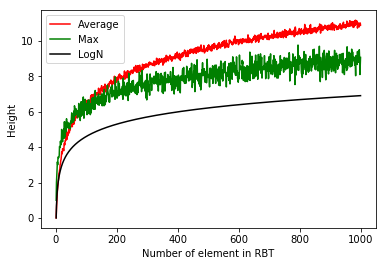

In [5]:
import random
import matplotlib.pyplot as plt
import math 


class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val


class Tree:
    def __init__(self):
        self.root = None
        
def make_list(node, lst):
    if node is None:
        return
    make_list(node.l_child, lst)
    lst.append(node.data)
    make_list(node.r_child, lst)
    
def list_make(node, lst):
    if node is None:
        return
    make_list(node.r_child, lst)
    lst.append(node.data)
    make_list(node.l_child, lst)

        
def minimum(node):
    while node.l_child is not None:
        node = node.l_child
    return node


def insert(tree, z):
    y = None
    x = tree.root
    while x is not None:
        y = x
        if z.data < x.data:
            x = x.l_child
        else:
            x = x.r_child
    z.parent = y
    if y is None:
        tree.root = z
    elif z.data < y.data:
        y.l_child = z
    else:
        y.r_child = z


def search(node, data):
    while (node is not None) and (node.data != data):
        if data < node.data:
            node = node.l_child
        else:
            node = node.r_child
    return node


def transplant(tree, u, v):
    if u.parent is None:
        tree.root = v
    elif u == u.parent.l_child:
        u.parent.l_child = v
    else:
        u.parent.r_child = v
    if v is not None:
        v.parent = u.parent


def delete(tree, node):
    if node.l_child is None:
        transplant(tree, node, node.r_child)

    # node has one child, move that child up
    elif node.r_child is None:
        transplant(tree, node, node.l_child)

    # node has two children, replace node by successor than remove successor
    else:
        successor = minimum(node.r_child)
        if successor.parent != node:
            transplant(tree, successor, successor.r_child)
            successor.r_child = node.r_child
            successor.r_child.parent = successor
        transplant(tree, node, successor)
        successor.l_child = node.l_child
        successor.l_child.parent = successor

#Average Number of Comparision 

def search_count(node, data):
    count=1
    while (node is not None) and (node.data != data):
        count+=1
        if data < node.data:
            node = node.l_child
        else:
            node = node.r_child
    return count


def avg_cmp(tree):
    empty=[]
    c_var=[]
    make_list(tree.root,empty)
    for i in empty: 
        c_var.append(search_count(tree.root,i))
    print("Average number of comparision:",float(sum(c_var)/len(empty)))
    

    
#Maximum height of tree 
def max_height_1(tree):
    lst=[]
    make_list(tree.root,lst)
    a=search_count(tree.root,lst[0])
    b=search_count(tree.root,lst[len(lst)-1])
    if a>=b: 
        return(a)
    else:
        return(b)
        
def max_height_2(tree):
    node=tree.root
    count1=1
    count2=1
    while node.l_child is not None:
        node = node.l_child
        count1+=1
    while node.r_child is not None:
        node = node.r_child
        count2+=1
    if count1>=count2:
        print('Max height:', count1)
    else:
        print("Max height:", count2)

        
#Average height of tree 
           
def ave_height(tree): 
    empty=[]
    c_var=[]
    make_list(tree.root,empty)
    for i in empty: 
        c_var.append(search_count(tree.root,i)-1)
    return(float(sum(c_var)/len(empty)))
    
#Test

def build_random_tree(length):
    to_insert=[random.randint(0,100000) for _ in range(length)]
    t = Tree()
    for i in to_insert:
        insert(t, Node(i))
    return(t)

N=1000
ave=[]
for i in range(1,N):
    var=0
    for _ in range(30):
        tree=build_random_tree(i)
        var+=ave_height(tree)
    ave.append(var/30)

maxi=[]
for i in range(1,N):
    var=0
    for _ in range(30):
        tree=build_random_tree(i)
        var+=max_height_1(tree)
    maxi.append(var/30)

x=[_ for _ in range(1,N)]
y=[math.log(_) for _ in x] 

ash1, =plt.plot(x,ave,"red")
ash2, = plt.plot(x,maxi,'green')
ash3, =plt.plot(x,y,'black')
plt.xlabel('Number of element in RBT')
plt.ylabel("Height")
plt.legend([ash1, ash2,ash3], ['Average', 'Max', 'LogN'])
plt.show()

In [14]:
import random
class Node1:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val
        self.count_left = 1


class Tree1:
    def __init__(self):
        self.root = None
        

def increment(Node):
    if Node is None: 
         return 
    else: 
        Node.count_left+=1
        increment(Node.l_child)
        increment(Node.r_child)

def insert(tree, z):
    y = None
    x = tree.root
    while x is not None:
        y = x
        if z.data < x.data:
            x.count_left+=1
            increment(x.r_child)
            x = x.l_child
        else:
            x = x.r_child
    z.parent = y
    if y is None:
        tree.root = z
    elif z.data < y.data:
        y.l_child = z
        z.count_left=z.parent.count_left-1
    else:
        y.r_child = z
        z.count_left=z.parent.count_left+1

def search(node, data):
    while (node is not None) and (node.data != data):
        if data < node.data:
            node = node.l_child
        else:
            node = node.r_child
    return node


def transplant(tree, u, v):
    if u.parent is None:
        tree.root = v
    elif u == u.parent.l_child:
        u.parent.l_child = v
    else:
        u.parent.r_child = v
    if v is not None:
        v.parent = u.parent


#Rank+Select of Binary Tree

def rank(tree,val): 
    z=search(tree.root,val)
    if z is None: 
        print("Item Not Found")
    else:
        print('The rank is:',z.count_left)

def select(tree,k):
    node=tree.root
    while (node is not None) and (node.count_left != k):
        if k < node.count_left:
            node = node.l_child
        else:
            node = node.r_child
    return(node.data)
    
t=Tree1()
x=[_ for _ in range(1,30)]
random.shuffle(x)

for _ in x:
    insert(t,Node1(_))

rank(t,5)
select(t,25)


The rank is: 5


25

# 11.2 

In [59]:
#fibo dynamic programming 

import math

#memoized 
def fib_memo(n):
    if n<=0: 
        return 0
    elif n==1:
        return 1
    else:
        r=[-math.inf]*(n+1)
        r[0]=0
        r[1]=1    
        return fib_memo_aux(n,r)
    
def fib_memo_aux(n,r):
    if r[n]>=0:
        return r[n]
    else: 
        val=fib_memo_aux(n-1,r)+fib_memo_aux(n-2,r)
        r[n]=val
    return val 
    

#bottom up 
def fib_bottom(n):
    if n<=0: 
        return 0
    elif n==1:
        return 1
    else:
        r=[0]*(n+1)
        r[0]=0
        r[1]=1
        if n<=0: 
            return r[0]
        elif n==1: 
            return r[1]
        else: 
            for _ in range(2,n+1): 
                val=r[_-1]+r[_-2]
                r[_]=val
            return r[n]
        
fib_bottom(125)-fib_bottom(125)

59425114757512643212875125

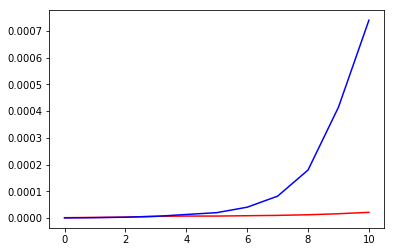

In [121]:
import math 
import timeit
import matplotlib.pyplot as plt 

def wrap2(func, args1,args2):
    def wrapped():
        return func(args1,args2)
    return wrapped

p=[1,5,8,9,10,17,17,20,24,30]

#cut rod 

def cut_rod(p,n):
    if n==0: 
        return 0
    q=-math.inf
    for i in range(1,n+1): 
        q=max(q,p[i-1]+cut_rod(p,n-i))
    return q



def cut_rod_mod(p,n):
    if n==0: 
        return 0
    if n<=10:        
        q=-math.inf
        for i in range(1,n+1): 
            q=max(q,p[i-1]+cut_rod(p,n-i))
        return q
    k=n % 10
    r=math.floor(n/10)
    q=-math.inf
    for i in range(1,k+1): 
        q=max(q,p[i-1]+cut_rod(p,k-i))
    if k==0: 
        return r*30
    else:
        return q+r*30

#cut rod dynamic programming

def ebu_cut_rod(p,n):
    r=[0]*(n+1)
    s=[0]*(n+1)
    for j in range(1,n+1): 
        q=-math.inf
        for i in range(1,j+1):
            if q<p[i-1]+r[j-i]:
                q=p[i-1]+r[j-i]
                s[j]=i
        r[j]=q
    return [r,s]

def print_cut_rod(p,n): 
    q=ebu_cut_rod(p,n)
    r,s=q[0],q[1]
    while n>0: 
        print(s[n])
        n=n-s[n]
        
y1=[]
y2=[]
x=[_ for _ in range(11)]
for _ in range(11): 
    a1=timeit.timeit(wrap2(ebu_cut_rod,p,_),number=1000)/1000
    a2=timeit.timeit(wrap2(cut_rod,p,_),number=1000)/1000
    y1.append(a1)
    y2.append(a2)
    
plt.plot(x,y1,'red')
plt.plot(x,y2,'blue')
plt.show()

In [6]:
def cut_rod(p,n):
    if n <= 0:
        return 0
    q = float('-inf')
    for i in range(1,len(p)+1):
        q = max(q, p[i-1]+ cut_rod(p,n-i)) 
    return q 
    
values_p = [1, 5, 8, 10, 17, 17, 20, 24, 30]
cut_rod(values_p,len(values_p))


55

In [5]:
p=[1,5,8,9,10,17,17,20,24,30]
import math 
#cut rod 

def cut_rod(p,n):
    if n==0: 
        return 0
    q=-math.inf
    for i in range(1,n+1): 
        q=max(q,p[i-1]+cut_rod(p,n-i))
    return q

cut_rod(p,10)

30

# 12.1

In [2]:
# currency trading

import math 
import numpy as np 

class GraphNode():
    def __init__(self,x):
        self.val=x
        self.prev=-1

TM=np.array([[1,0.741,0.657,1.061,1.005],[1.349,1,0.888,1.433,1.366],
             [1.521,1.126,1,1.614,1.538],[0.942,0.698,0.619,1,0.953],[0.995,0.732,0.650,1.049,1]])

def initialize(start,TM):
    nodes=[GraphNode(1.0) for _ in range(TM.shape[0])]
    nodes[start].val=0 
    return nodes 
    
    
def curr_path(start,TM,end):
    nodes=initialize(start,TM)
    current=-math.inf
    if start==end: 
        return 1
    for _ in range(len(nodes)):
        y=curr_path(_,TM,end)
        if current<TM[start,_]*y: 
            current=TM[start,_]*y
            nodes[_].val=current
            print(current)
    
curr_path(3,TM,1)
    

RecursionError: maximum recursion depth exceeded

In [36]:
#coin game
import numpy as np 

coin=[8,15,3,7]

def maxcoin(coins):
    memo=np.zeros(shape=(len(coins),len(coins)))
    for _ in range(len(coins)): 
        i=0
        while i<_ and _<len(coins):
            if i==_: 
                memo[i,_]= coins[i]
                i+=1
                _+=1
            if _==i+1: 
                memo[i,_]=max(coins[i],coins[_])
                i+=1
                _+=1
            val=max(coin[i]+min(memo[i+2,_],memo[i+1,_-1]),coin[_]+min(memo[i+1,_-1],memo[i,_-2]))
            memo[i,_]=val
            i+=1
            _+=1
            return memo
    
    
maxcoin(coin)

array([[  0.,  15.,   0.,   0.],
       [  0.,   0.,  15.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])


# 13.1 

In [46]:
#  1. Solve your assigned problem.  Since the assignment is deterministic, you
#     can also find out who else is working on the same problem.  Feel free to
#     approach other students if you get stuck conceptually, but write your
#     code by yourself.
#  2. Now answer the following questions on your solution
#     a) Define variables which will be useful in determining the computational
#        complexity of your solution.
#     b) How does it scale in terms of time (using your variables from a)?
#     c) How does it scale in terms of space (using your variables from a)?
#     d) Each problem has an example so that you can see how to structure your
#        solution.  However the answers to the examples are wrong.  What is the
#        actual answer for your example documentation?
#
# Directions:
# -----------
#
# You and your friends rented a bus and have gotten lost.  This is because the
# person with the map was sitting at the back of the bus and gave directions to
# the person in front of them.  This person then told the person in front of them.
# Eventually the directions reached the driver in the front.  Occasionally someone
# would make a mistake, and they would either:
#  - leave out a step,
#  - add a step,
#  - give the wrong instruction.
#
# Each direction was either "Straight", "Left", or "Right".
#
# You and you friends would like to figure out who made the most mistakes.
# Fortunately everyone wrote down the instructions they gave. Write a function
# ('blame') to figure out who is to blame.
#
# directions = [('map', 'SSSRSSLRLS'), ('jane', 'SSRSLSLSSRLS'), ('jayna',
#                'SRSLSLSRLS'), ('jomo', 'SRSLRRSLSRSLSR')]
#
# >>> print(blame(directions))
# 'jayna'


def LCS(X, Y):
    m = len(X)
    n = len(Y)
    # An (m+1) times (n+1) matrix
    C = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                C[i][j] = C[i - 1][j - 1] + 1
            else:
                C[i][j] = max(C[i][j - 1], C[i - 1][j])
    return C


def printLCS(C, X, Y, i=None, j=None):
    if i is None:
        i = len(X)
    if j is None:
        j = len(Y)
    if i == 0 or j == 0:
        return set([""])
    elif X[i - 1] == Y[j - 1]:
        return set([Z + X[i - 1] for Z in backTrackAll(C, X, Y, i - 1, j - 1)])
    else:
        R = set()
        if C[i][j - 1] >= C[i - 1][j]:
            R.update(backTrackAll(C, X, Y, i, j - 1))
        if C[i - 1][j] >= C[i][j - 1]:
            R.update(backTrackAll(C, X, Y, i - 1, j))
        return R
    
def countstring(S):
    return S.count('S')+S.count('L')+S.count('R')

def compare(s1,s2):
    C=LCS(s1,s2)
    a=printLCS(C,s1,s2).pop()
    l1=countstring(s1)
    l2=countstring(s2)
    la=countstring(a)
    return abs(l1-la)+abs(l2-la)

def blame(d):
    blame=[]
    for _ in range(len(d)-1):
        mistake=compare(d[_][1],d[_+1][1])
        blame.append(mistake)
    return d[blame.index(max(blame))+1][0]
        
directions = [('map', 'SSSRSSLRLS'), ('jane', 'SSRSLSLSSRLS'), ('jayna',
              'SRSLSLSRLS'), ('jomo', 'SRSLRRSLSRSLSR')]

blame(directions)


'jane'